## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Load and visualize the dataset.

In [2]:
data = pd.read_csv('Credit.csv').drop(['Unnamed: 0'], axis = 1)

In [3]:
data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
data.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
ID           400 non-null int64
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [6]:
data.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


# Visualisation

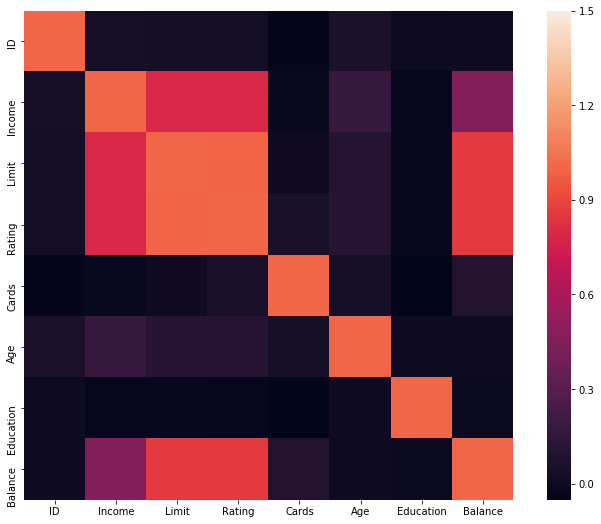

In [7]:
import seaborn as sns
# visualizing the correlation matrix using heatmap
corrmat =data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1.5, square=True)

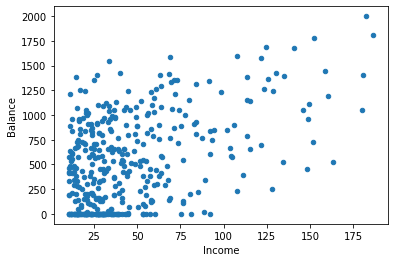

In [8]:
# scatterplot of Balance vs Income
var = 'Income'
data_df = pd.concat([data['Balance'], data[var]], axis=1)
data_df.plot.scatter(x=var, y='Balance');

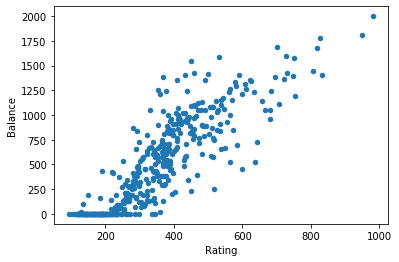

In [9]:
# scatterplot of Balance vs Income
var = 'Rating'
data_df = pd.concat([data['Balance'], data[var]], axis=1)
data_df.plot.scatter(x=var, y='Balance');

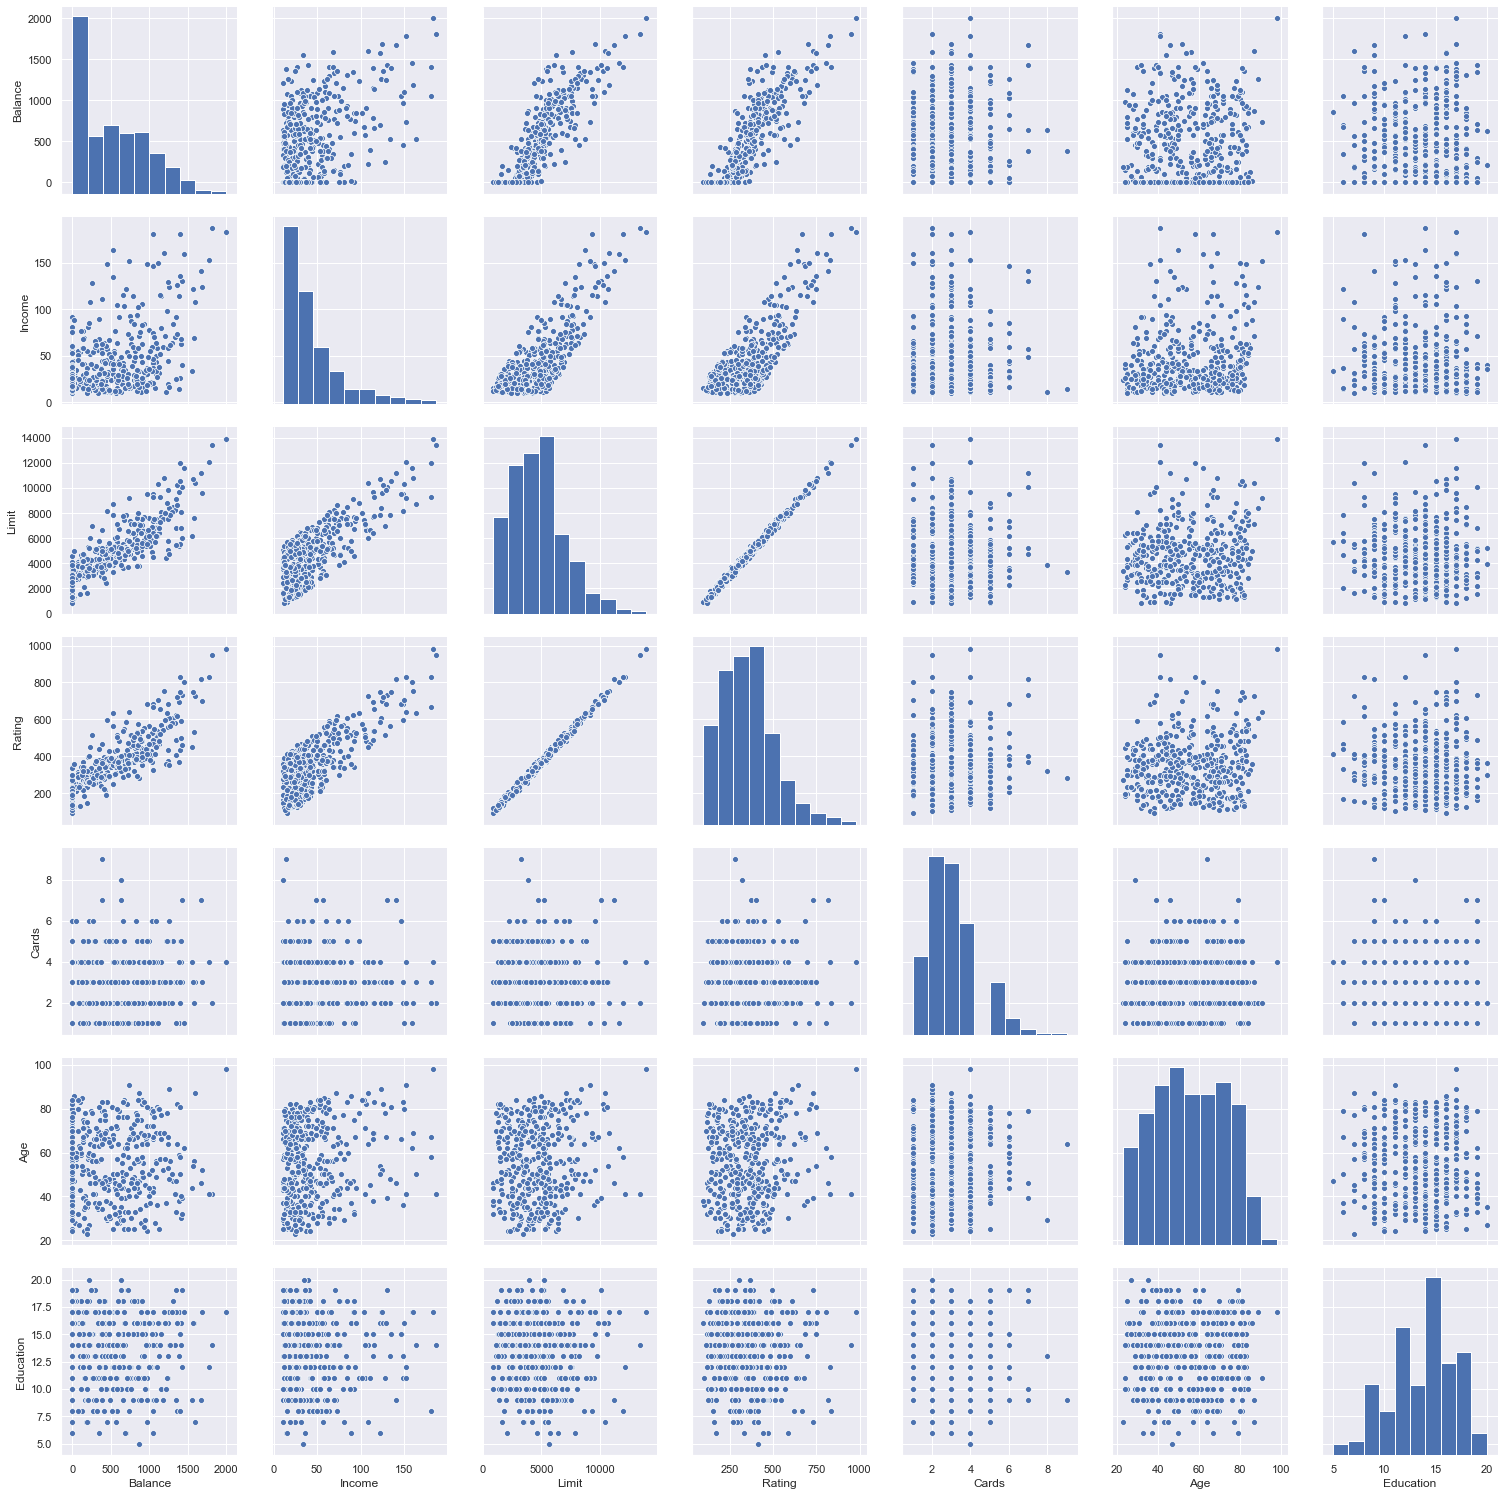

In [10]:
sns.set()
cols = ['Balance', 'Income','Limit', 'Rating','Cards','Age','Education']
sns.pairplot(data[cols], size=3.0)
plt.show()

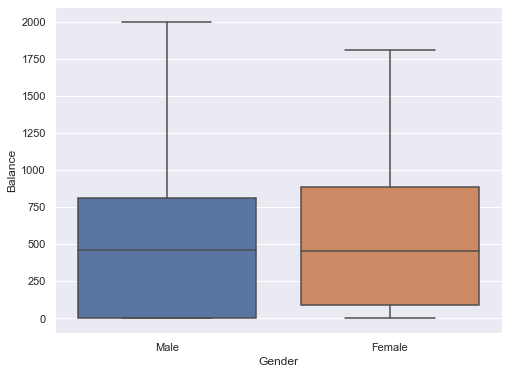

In [11]:
# box-plot Gender/Balance
var1 = 'Balance'
var = 'Gender'
data_df = pd.concat([data[var1], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data_df)

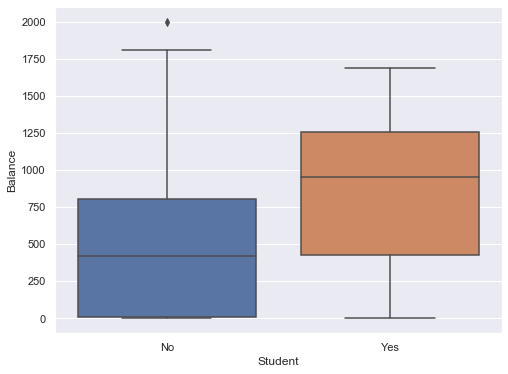

In [12]:
# box-plots
var1 = 'Balance'
var = 'Student'
data_df = pd.concat([data[var1], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data_df)

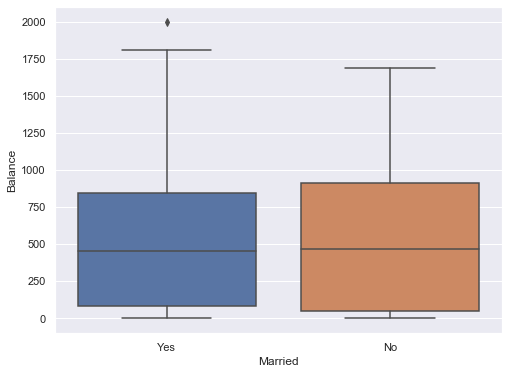

In [13]:
# box-plot
var1 = 'Balance'
var = 'Married'
data_df = pd.concat([data[var1], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data_df)

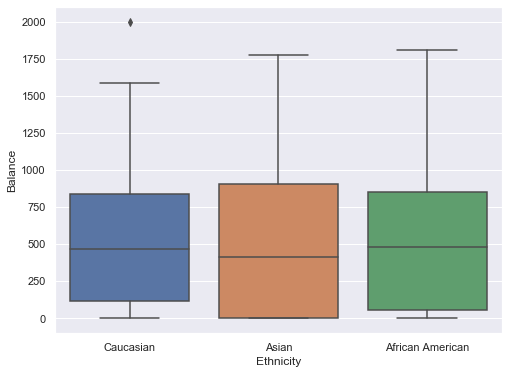

In [14]:
# box-plot
var1 = 'Balance'
var = 'Ethnicity'
data_df = pd.concat([data[var1], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data_df)

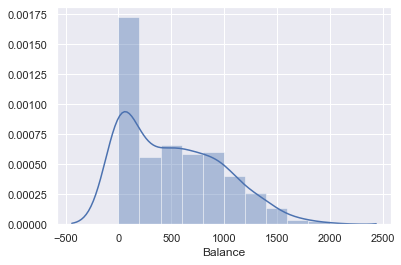

In [15]:
sns.distplot(data['Balance'])

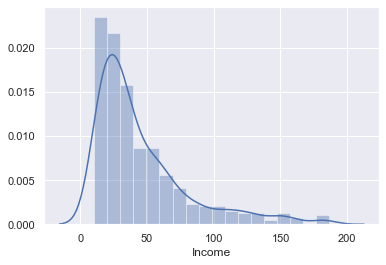

In [16]:
sns.distplot(data['Income'])

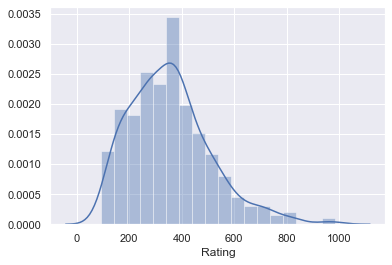

In [17]:
sns.distplot(data['Rating'])

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [18]:
data['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [19]:
pd.get_dummies(data['Ethnicity'], prefix = 'Ethnicity').head()

,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [20]:
data['Student'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
pd.get_dummies(data['Student'], prefix = 'Student')

,Student_No,Student_Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [22]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
pd.get_dummies(data['Married'], prefix='Married').head()

,Married_No,Married_Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [24]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
pd.get_dummies(data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

#### Split dataset into training and validation set (80:20)

In [26]:
from sklearn.model_selection import train_test_split
data_preproc = pd.get_dummies(data, prefix = ['Gender','Student','Married','Ethnicity']).drop(['Married_No',
                                                                                               'Student_No',
                                                                                               'Gender_Female',
                                                                                               'Ethnicity_Asian'],
                                                                                              axis = 1)
X,y = data_preproc.drop(['Balance','ID'], axis = 1), data_preproc['Balance']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

#### Use linear regression. 
- Report training and validation error. 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler


lin = LinearRegression()
lin.fit(X_train, y_train)

print('Training MSE is', mean_squared_error(lin.predict(X_train),y_train))
print('Validation MSE is', mean_squared_error(lin.predict(X_valid),y_valid))

Training MSE is 9700.516360054376
Validation MSE is 8945.326462478735


#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [31]:
alpha = np.logspace(-3,3,50)
ridge_training_error = []
ridge_valid_error = []
coef = np.zeros((len(alpha),11))
k=0
for i in alpha:
    data1_ridge = Ridge(alpha = i)
    data1_ridge.fit(X_train_scaled, y_train)
    x_new = np.arange(-8,11,1).reshape(-1,1)
    coef[k] = data1_ridge.coef_
    k+=1
    ridge_training_error += [mean_squared_error(y_train, data1_ridge.predict(X_train_scaled))]
    ridge_valid_error += [ mean_squared_error(y_valid, data1_ridge.predict(X_valid_scaled))]

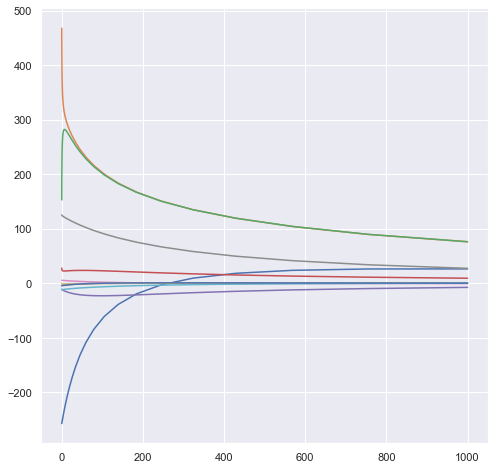

In [32]:
plt.figure(figsize=(8,8))
for i in range(11):
    plt.plot(alpha,coef[:,i])

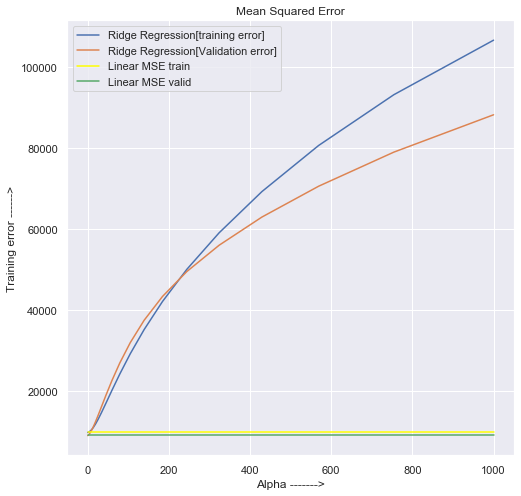

In [33]:
plt.figure(figsize=(8,8))
plt.plot(alpha, ridge_training_error, label = 'Ridge Regression[training error]')
plt.plot(alpha, ridge_valid_error, label = 'Ridge Regression[Validation error]')
plt.plot(alpha, [mean_squared_error(lin.predict(X_train),y_train)]*len(alpha),'yellow', label ='Linear MSE train')
plt.plot(alpha, [mean_squared_error(lin.predict(X_valid),y_valid)]*len(alpha), label = 'Linear MSE valid')
plt.title('Mean Squared Error')
plt.xlabel('Alpha ------->')
plt.ylabel('Training error ------>')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':alpha}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print('Optimal value is',clf.best_params_)

Optimal value is {'alpha': 0.3727593720314938}


####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [36]:
alpha = np.logspace(-3,3,50)
lasso_training_error = []
lasso_valid_error = []
coef = np.zeros((len(alpha),11))
k=0

for i in alpha:
    data1_lasso = Lasso(alpha = i)
    data1_lasso.fit(X_train_scaled, y_train)
    coef[k] = data1_lasso.coef_
    k+=1
    lasso_training_error += [mean_squared_error(y_train, data1_lasso.predict(X_train_scaled))]
    lasso_valid_error += [ mean_squared_error(y_valid, data1_lasso.predict(X_valid_scaled))]

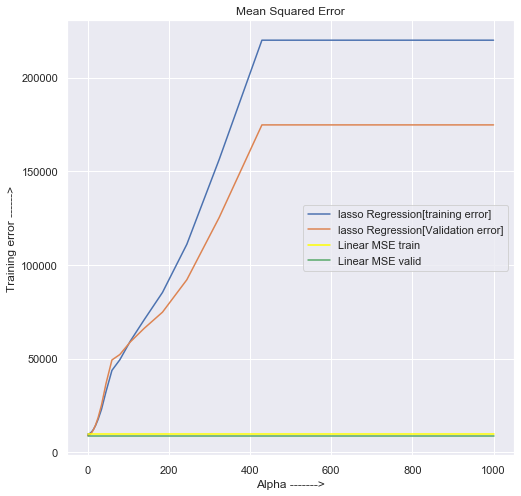

In [37]:
plt.figure(figsize=(8,8))
plt.plot(alpha, lasso_training_error, label = 'lasso Regression[training error]')
plt.plot(alpha, lasso_valid_error, label = 'lasso Regression[Validation error]')
plt.plot(alpha, [mean_squared_error(lin.predict(X_train),y_train)]*len(alpha),'yellow', label ='Linear MSE train')
plt.plot(alpha, [mean_squared_error(lin.predict(X_valid),y_valid)]*len(alpha), label = 'Linear MSE valid')
plt.title('Mean Squared Error')
plt.xlabel('Alpha ------->')
plt.ylabel('Training error ------>')
plt.legend()
plt.show()

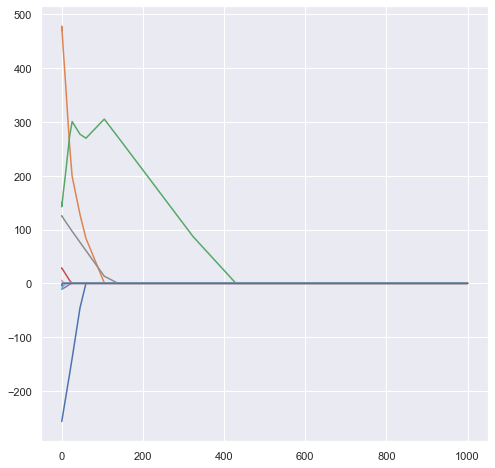

In [38]:
plt.figure(figsize=(8,8))
for i in range(11):
    plt.plot(alpha,coef[:,i])

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':alpha}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=5)

In [40]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.088...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
print('Optimal value is',clf.best_params_)

Optimal value is {'alpha': 1.5264179671752334}


#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

In [42]:
alpha = 1.5264179671752334
lasso_tuned = Lasso(alpha = alpha)
lasso_tuned.fit(X_train_scaled,y_train)
lasso_tuned.coef_

array([-249.90909102,  460.81039524,  152.32528647,   26.64574797,
        -10.47494779,   -2.39841824,    3.90744272,  123.82302592,
          0.        ,   -7.50128383,   -0.7308734 ])

In [43]:
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,1,0,1,0,1
1,106.025,6645,483,3,82,15,0,1,1,0,0
2,104.593,7075,514,4,71,11,1,0,0,0,0
3,148.924,9504,681,3,36,11,0,0,0,0,0
4,55.882,4897,357,2,68,16,1,0,1,0,1


#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.